# Atividade Computacional 2

PPGEE0018: Processamento Digital de Sinais.

Aluno: Ricardo Augusto de Araújo Machado

In [1]:
from scipy.io.wavfile import read
from pathlib import Path
import scipy.signal as sps
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (9, 6)
sns.set_theme(style="whitegrid")

Para realização da atividade foi utilizado uma gravação do tema de jazz "Round Midnight" com guitarra, bateria e baixo elétrico.

In [2]:
audio_path = Path('dados/round midnight.wav')
fs, dados_wav = read(audio_path)
dados_wav = dados_wav[:, 0]  # Pega apenas um canal do áudio

/tmp/ipykernel_80990/2992843450.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, dados_wav = read(audio_path)


Inicialmente, define-se janelas de Hamming, Hann e Blackman com comprimento de 30 ms.

In [3]:
COMPRIMENTO_JANELA_MS = 30  # ms
NUM_PONTOS = int(COMPRIMENTO_JANELA_MS * fs / 1000)
time = np.linspace(0, COMPRIMENTO_JANELA_MS / 1000, NUM_PONTOS)
hamming_window = sps.windows.hamming(NUM_PONTOS)
hann_window = sps.windows.hann(NUM_PONTOS)
blackman_window = sps.windows.blackman(NUM_PONTOS)

Plotagem das janelas utilizadas.

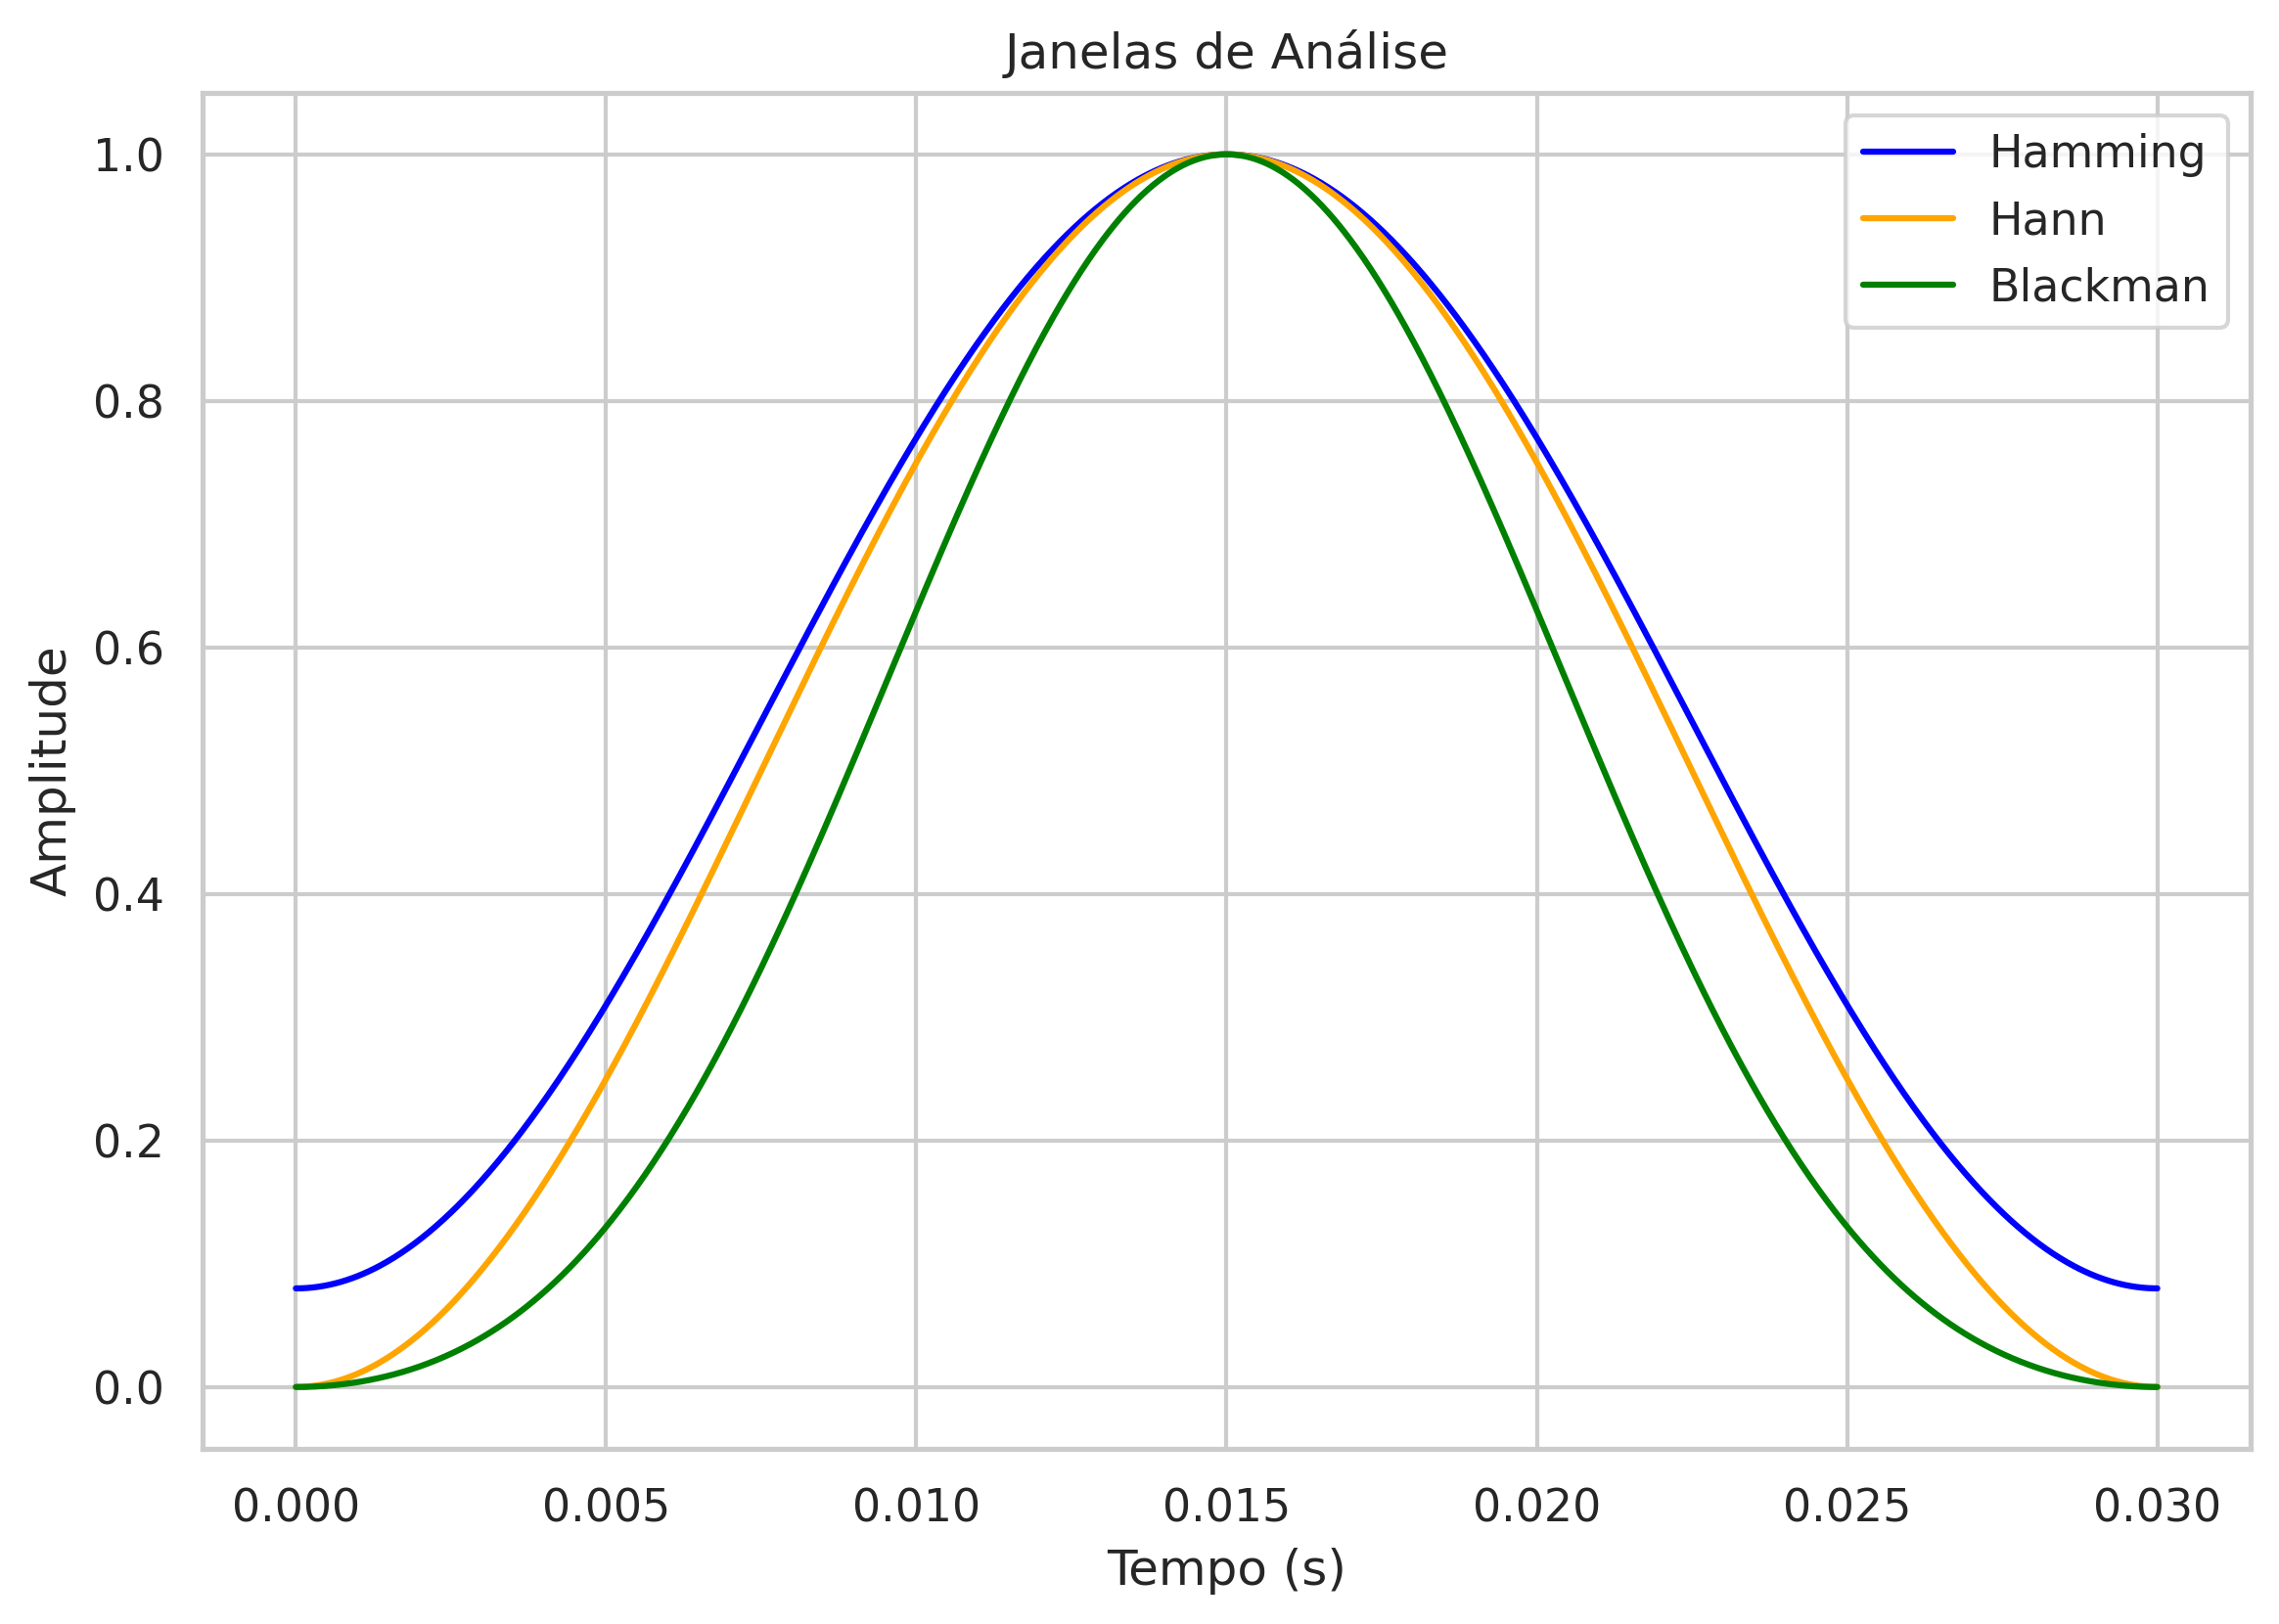

In [4]:
#Plot das janelas
sns.lineplot(x=time, y=hamming_window, label='Hamming', color='blue')
sns.lineplot(x=time, y=hann_window, label='Hann', color='orange')
sns.lineplot(x=time, y=blackman_window, label='Blackman', color='green')
plt.title('Janelas de Análise')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

Criação da função para calcular a Short Time Fourier Transform do sinal dada um determinada janela e um hop size.

In [5]:
def plotar_espectrograma(dado_wav, window: np.ndarray, hop_size: int, fs: float, output_name:str="") -> None:
    # Calcular a STFT
    freq, tempo, matriz_stft = sps.stft(dado_wav, fs=fs, window=window, nperseg=len(window), noverlap=len(window)-hop_size, scaling='spectrum')
    espectrograma_audio = np.abs(matriz_stft) ** 2

    # Limitar a frequência máxima para 2 kHz
    freq_max = 2000  # Hz
    idx_max = np.argmin(np.abs(freq - freq_max))
    freq = freq[:idx_max]
    espectrograma_audio = espectrograma_audio[:idx_max, :]

    # Plotar o espectrograma
    sns.heatmap(10 * np.log10(espectrograma_audio + 1e-10), cmap='flare_r')
    plt.xticks(ticks=np.linspace(0, len(tempo)-1, 10), labels=np.round(np.linspace(0, tempo[-1], 10), 2))
    plt.yticks(ticks=np.linspace(0, len(freq)-1, 10), labels=np.round(np.linspace(0, freq[-1], 10)/1000, 2))
    plt.xlabel('Tempo (s)')
    plt.ylabel('Frequência (kHz)')
    plt.title('Espectrograma do áudio (até 2 kHz)')
    plt.savefig(f'espectrograma_{output_name}.png')
    plt.show()


Espectograma obtido com a janela de Blackman.

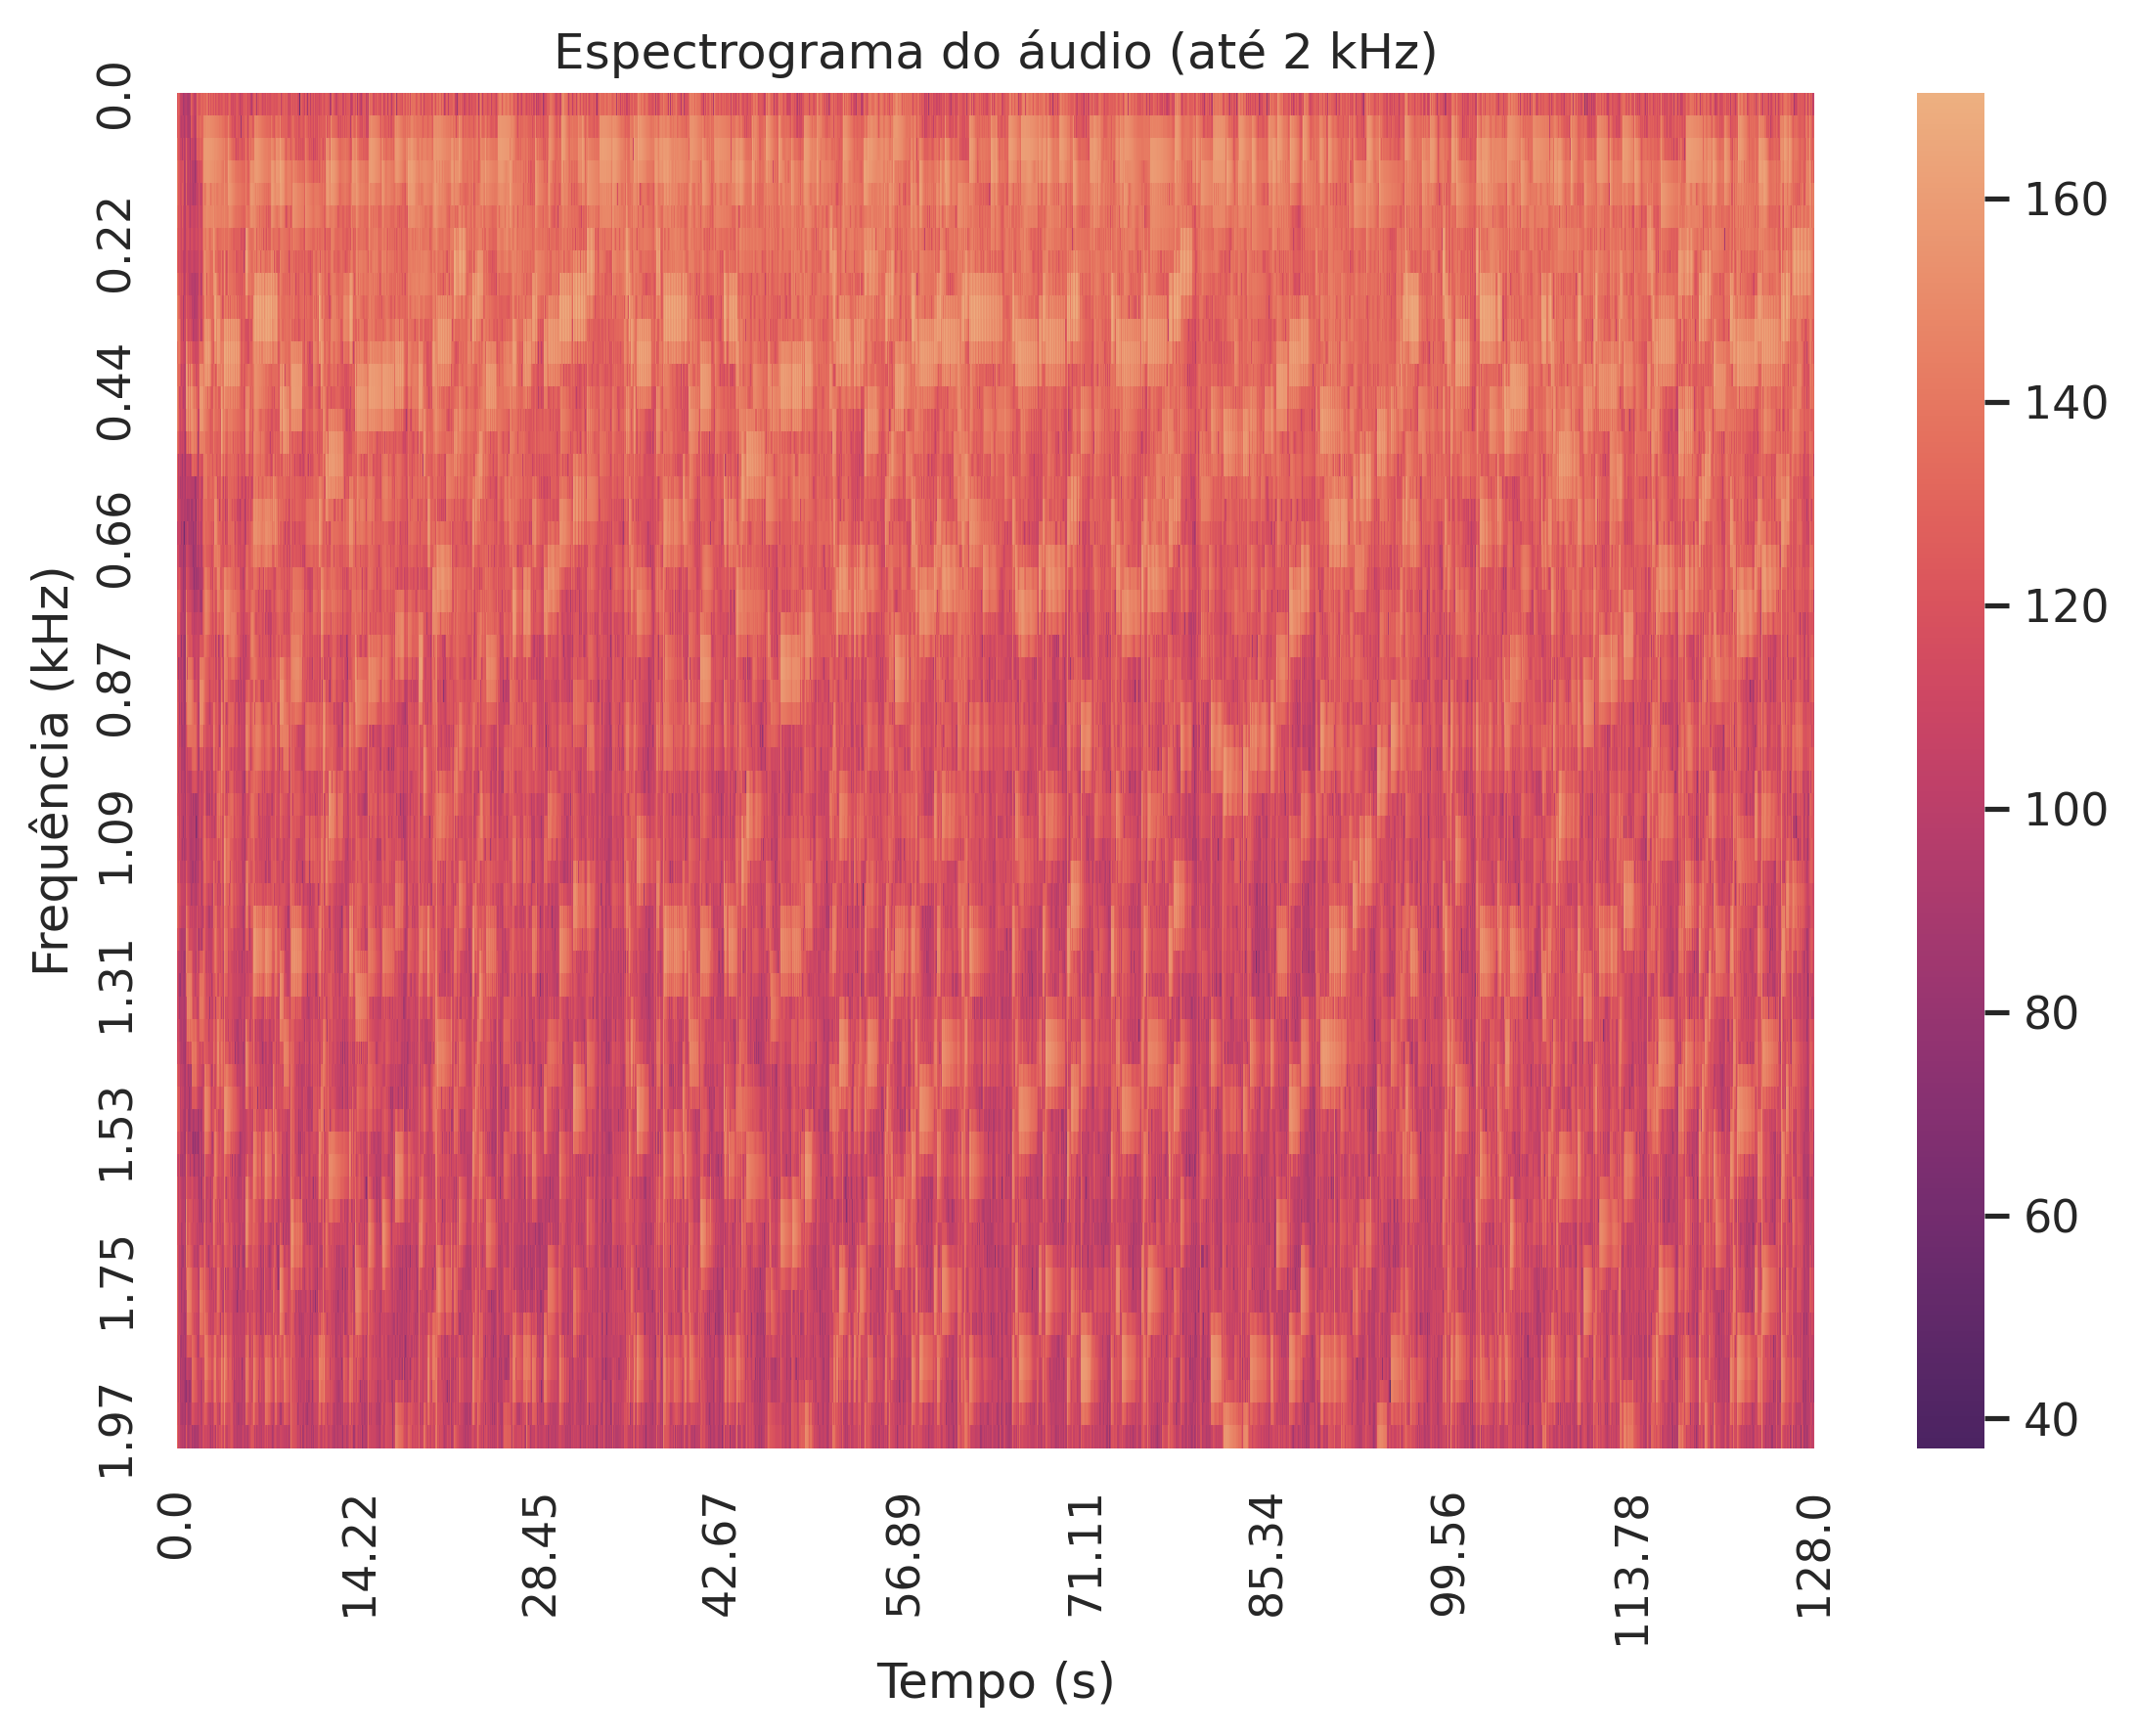

In [6]:
plotar_espectrograma(dados_wav, blackman_window, hop_size=NUM_PONTOS // 2, fs=fs, output_name="Blackman")

Espectograma obtido com a janela de Hann.

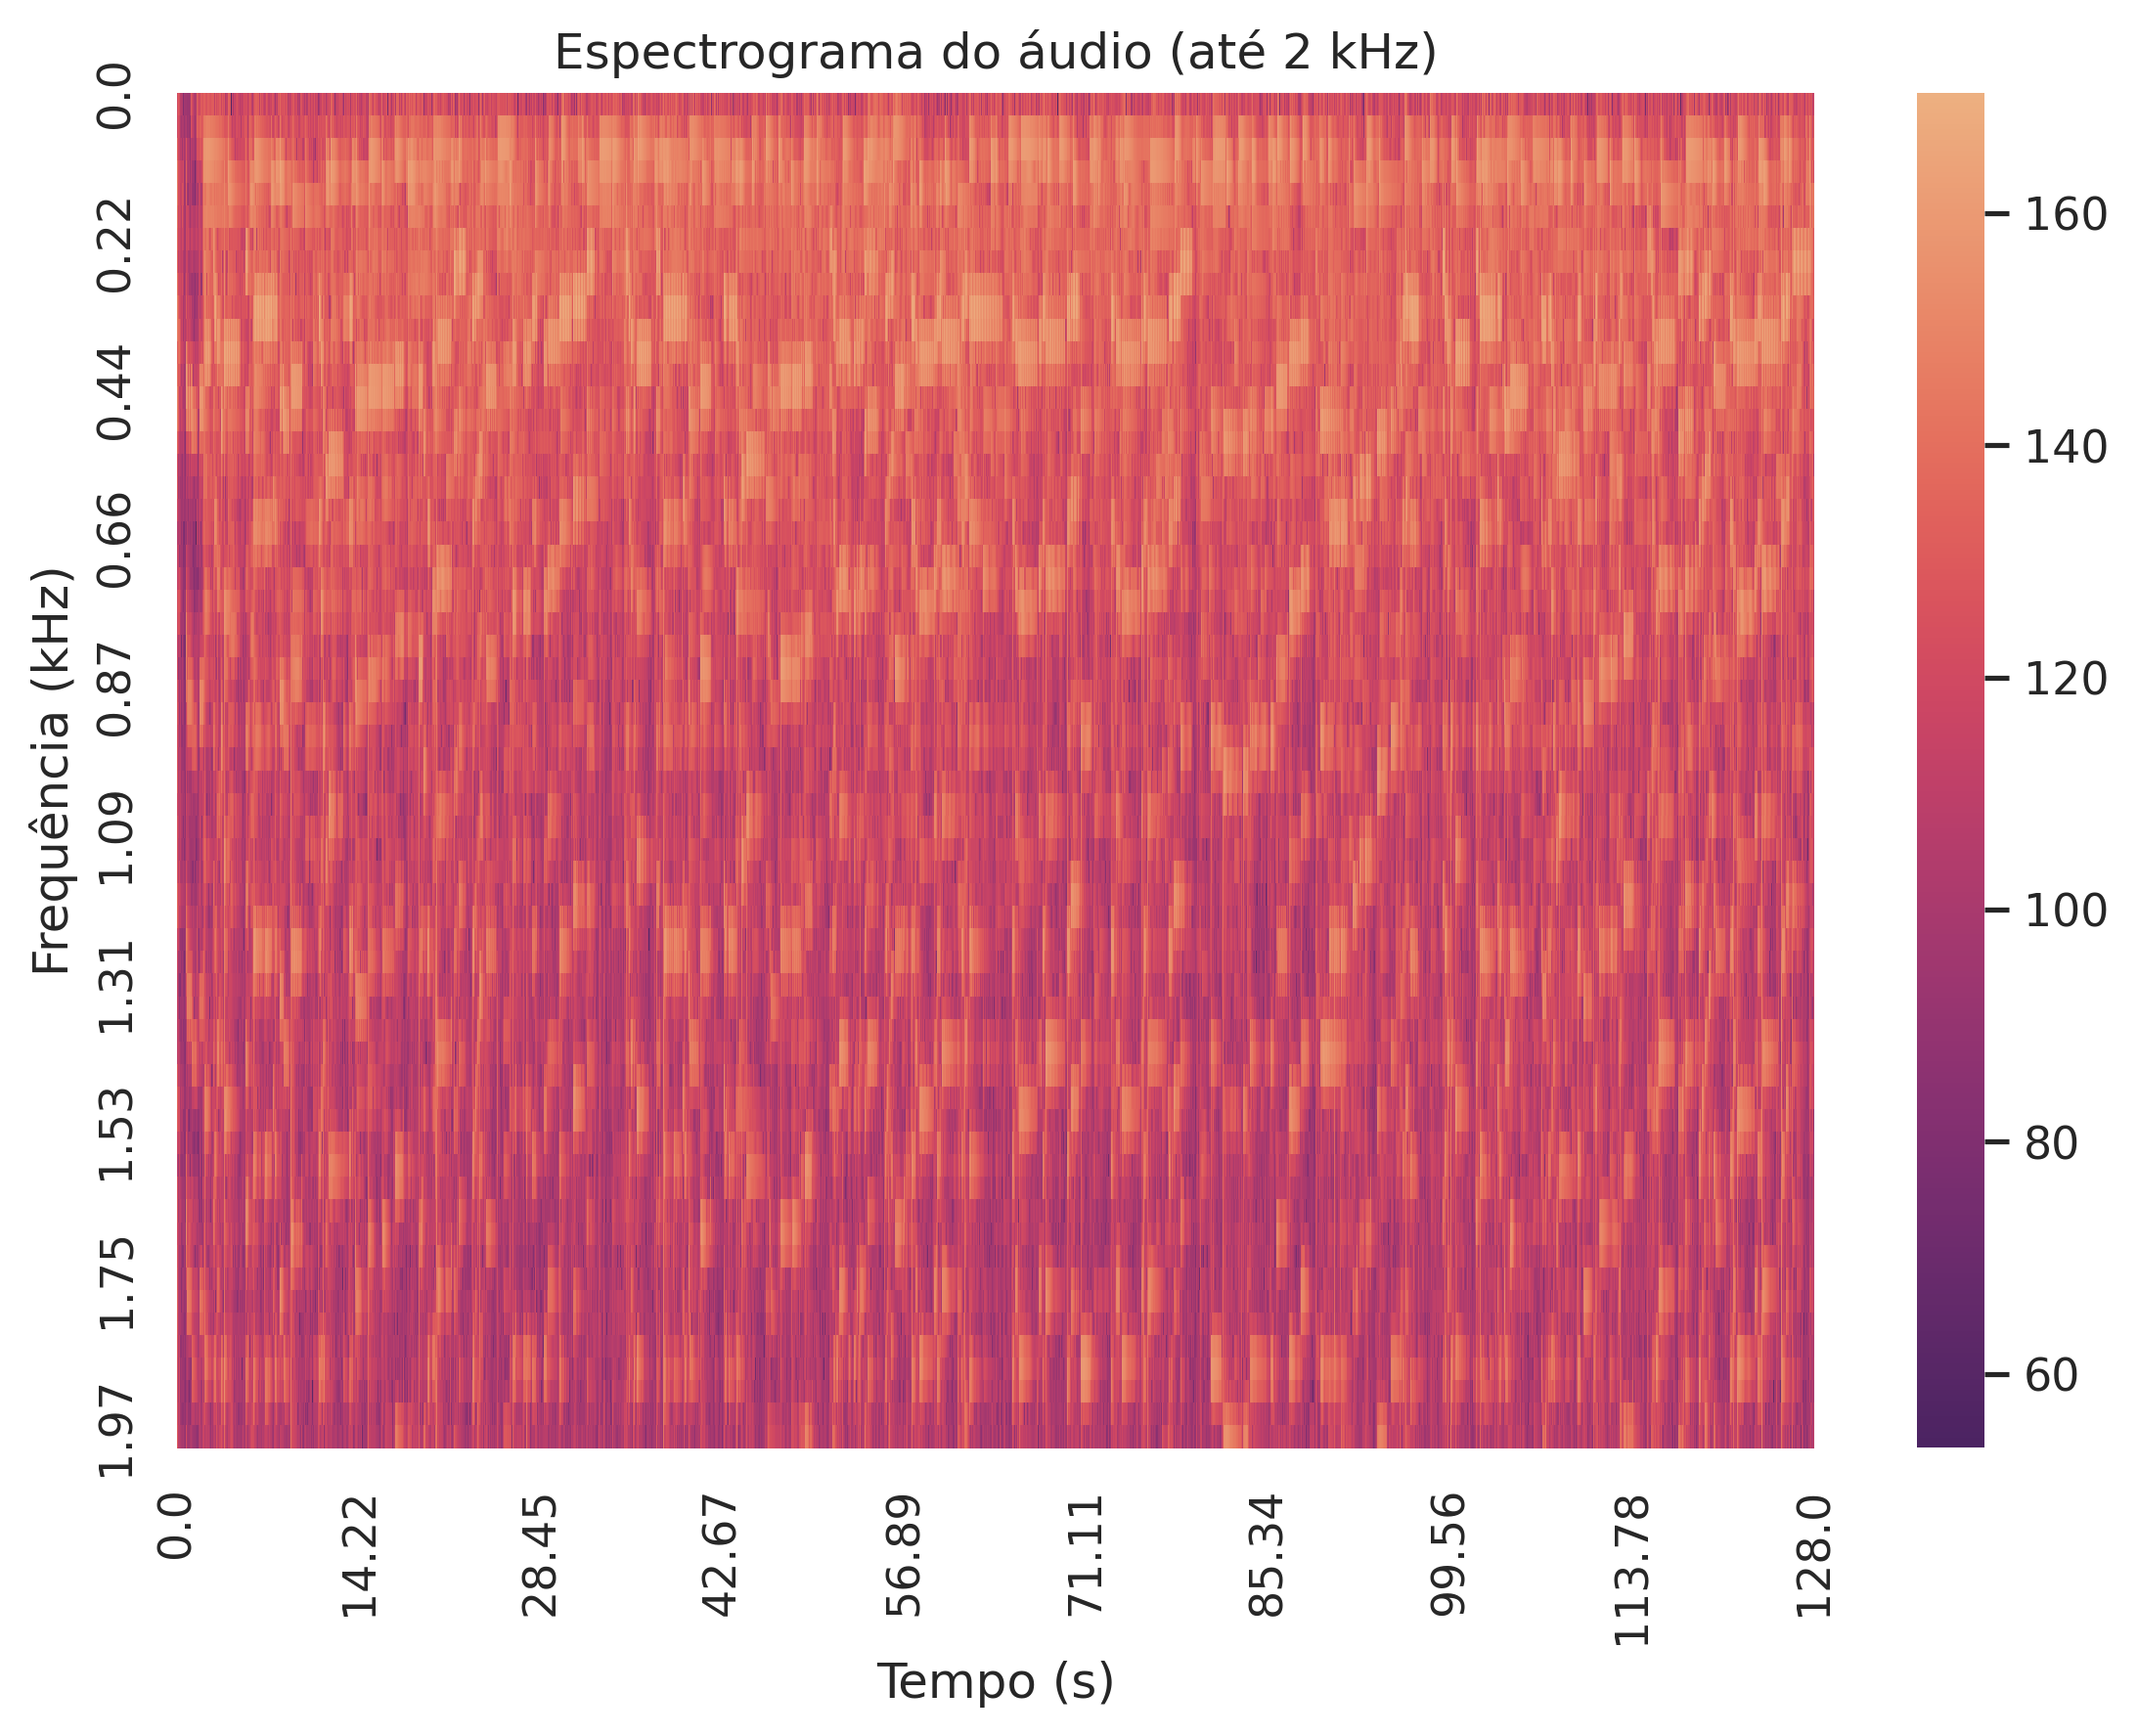

In [7]:
plotar_espectrograma(dados_wav, hann_window, hop_size=NUM_PONTOS // 2, fs=fs, output_name="Hann")

Espectograma obtido com a janela de Hamming.

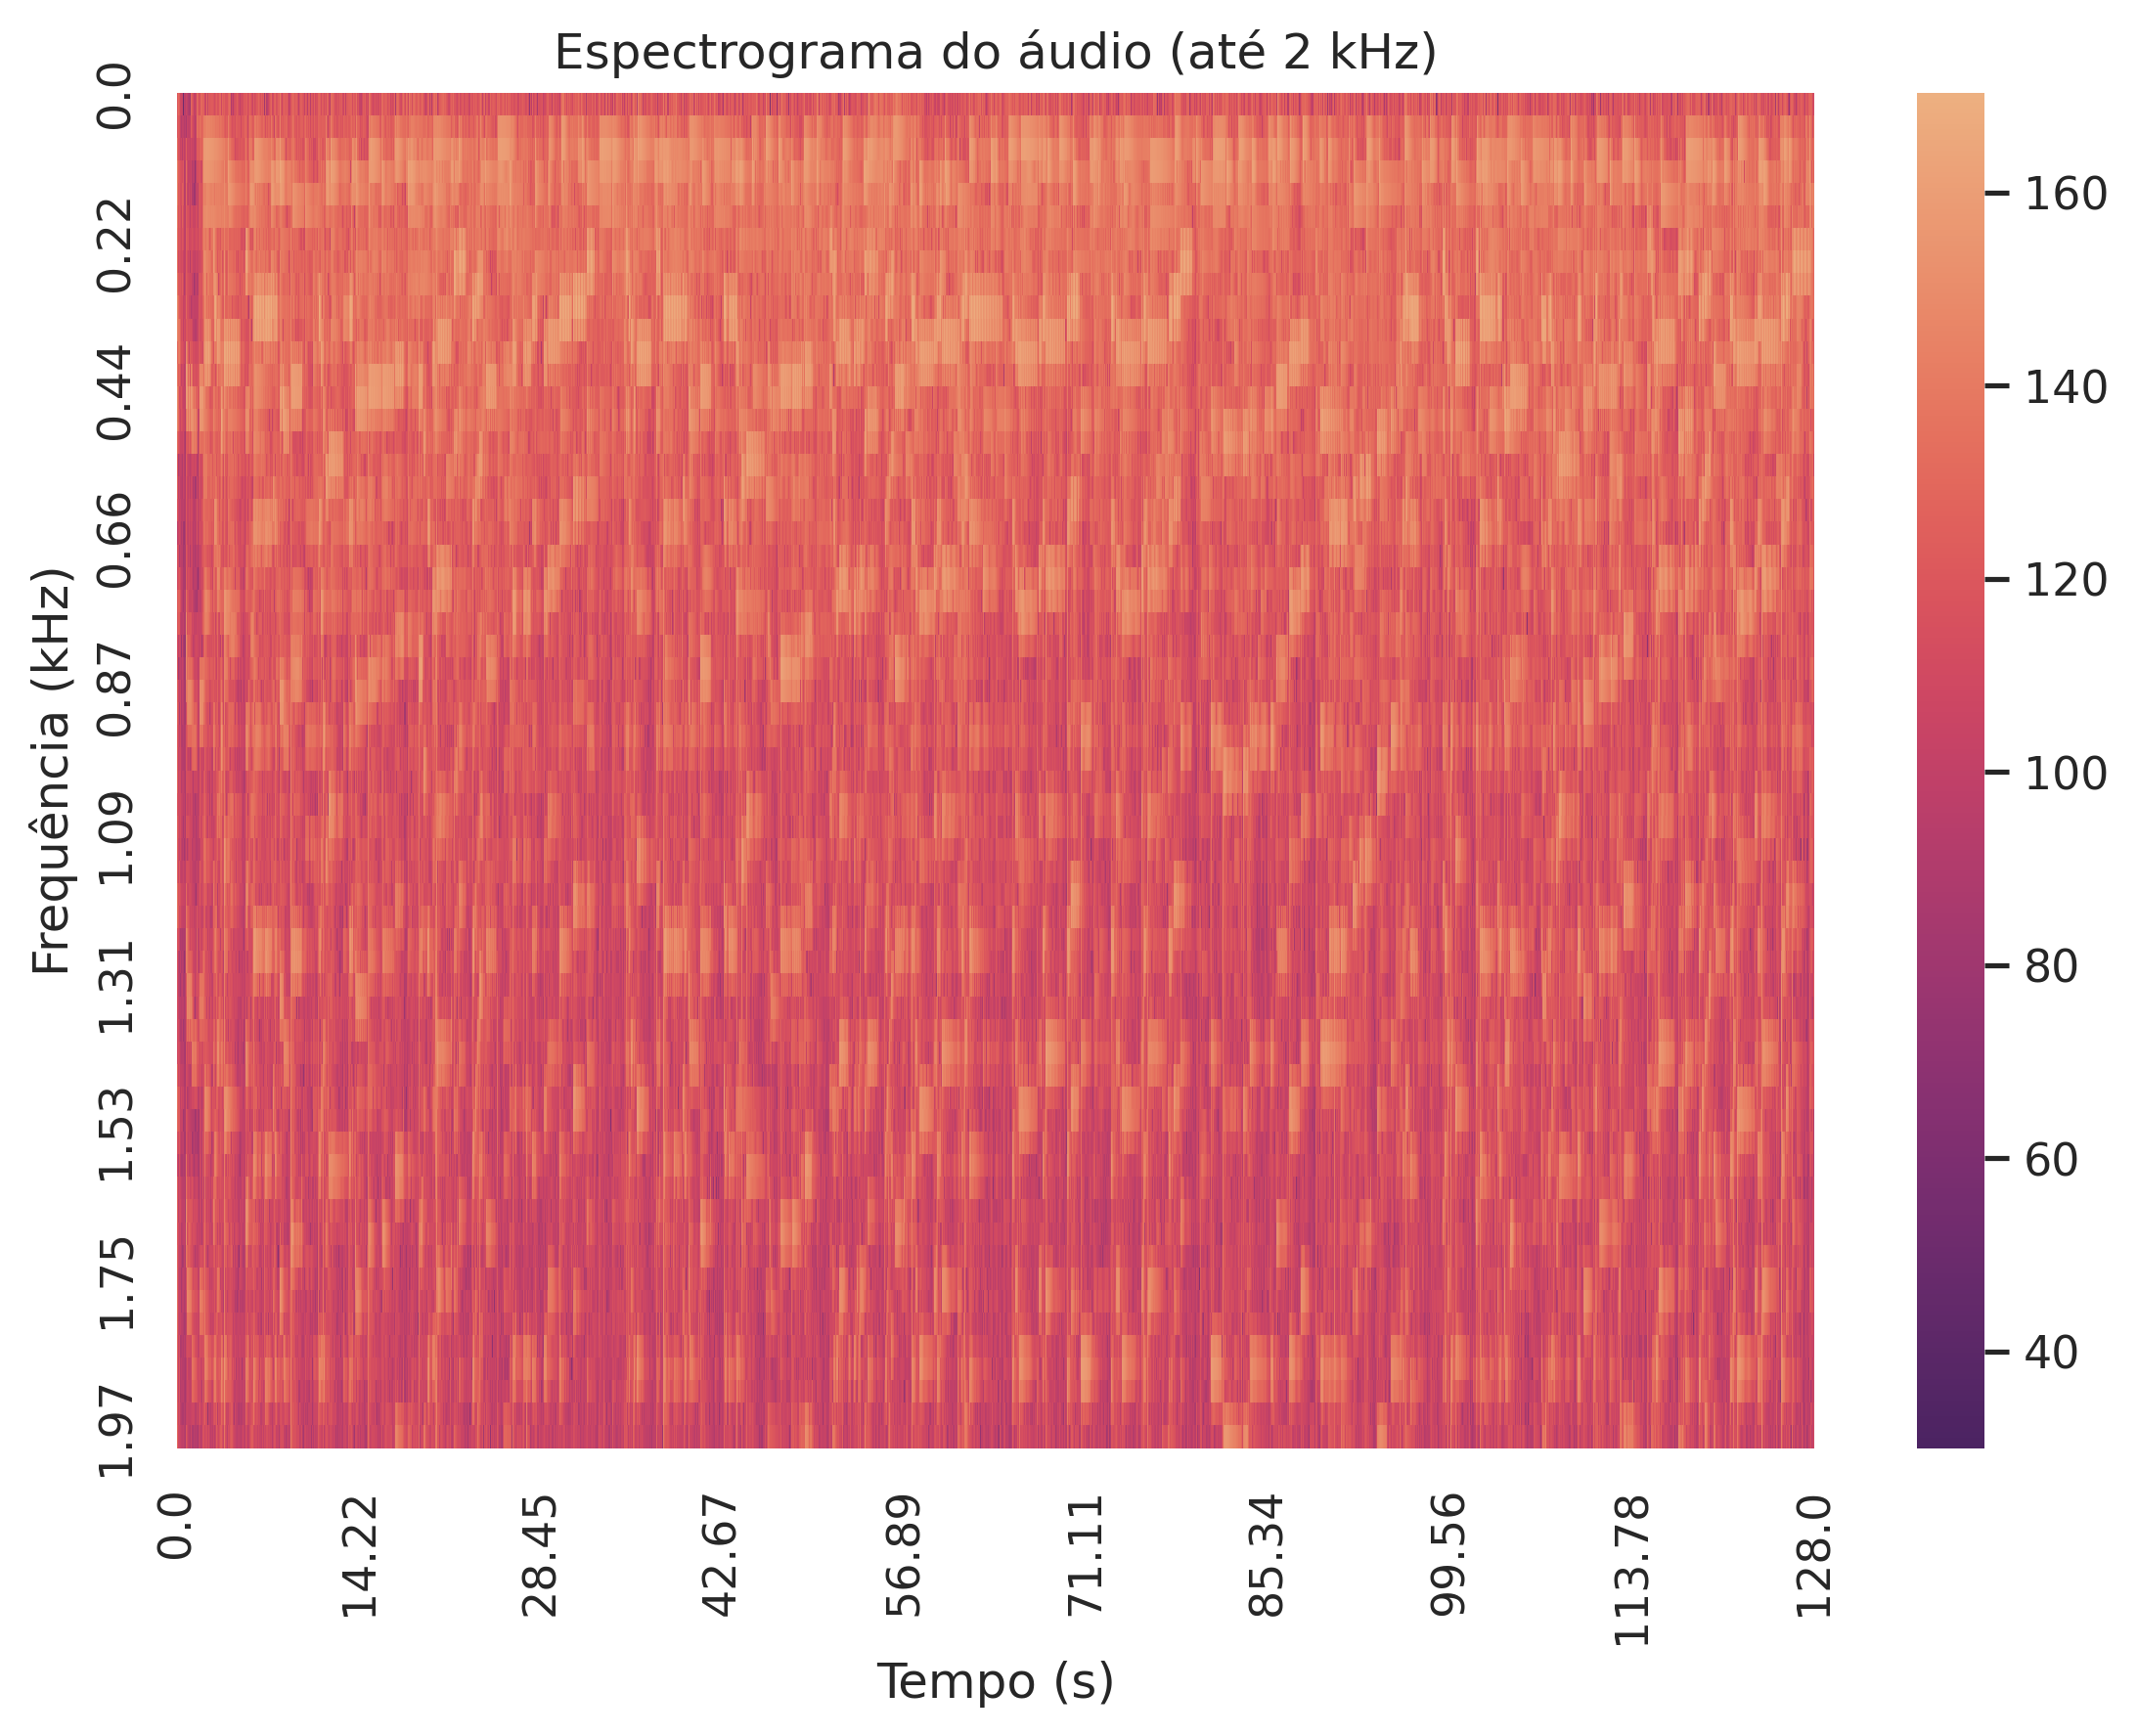

In [8]:
plotar_espectrograma(dados_wav, hamming_window, hop_size=NUM_PONTOS // 2, fs=fs, output_name="Hamming")

Os três espectogramas não apresentam dferenças muito sigficativas, o que é esperado, pois o mesmo sinal é analisado nos três casos, variando apenas a janela.

TODO: Inserir mais comentários sobre as diferenças.

O próximo passo é analisar para a janela de Hamming, o efeito da variação do comprimento da janela no espectograma.

Definição de uma janela com 100 ms de comprimento e uma janela com 10 ms de comprimento.

In [9]:
NUM_PONTOS_10_MS = int(10 * fs / 1000)
NUM_PONTOS_100_MS = int(100 * fs / 1000)
# Janela de 10 ms
time_10_ms = np.linspace(0, 10 / 1000, NUM_PONTOS_10_MS)
hamming_window_10_ms = sps.windows.hamming(NUM_PONTOS_10_MS)
# Janela de 100 ms
time_100_ms = np.linspace(0, 100 / 1000, NUM_PONTOS_100_MS)
hamming_window_100_ms = sps.windows.hamming(NUM_PONTOS_100_MS)

Plotagem das janelas utilizidas.

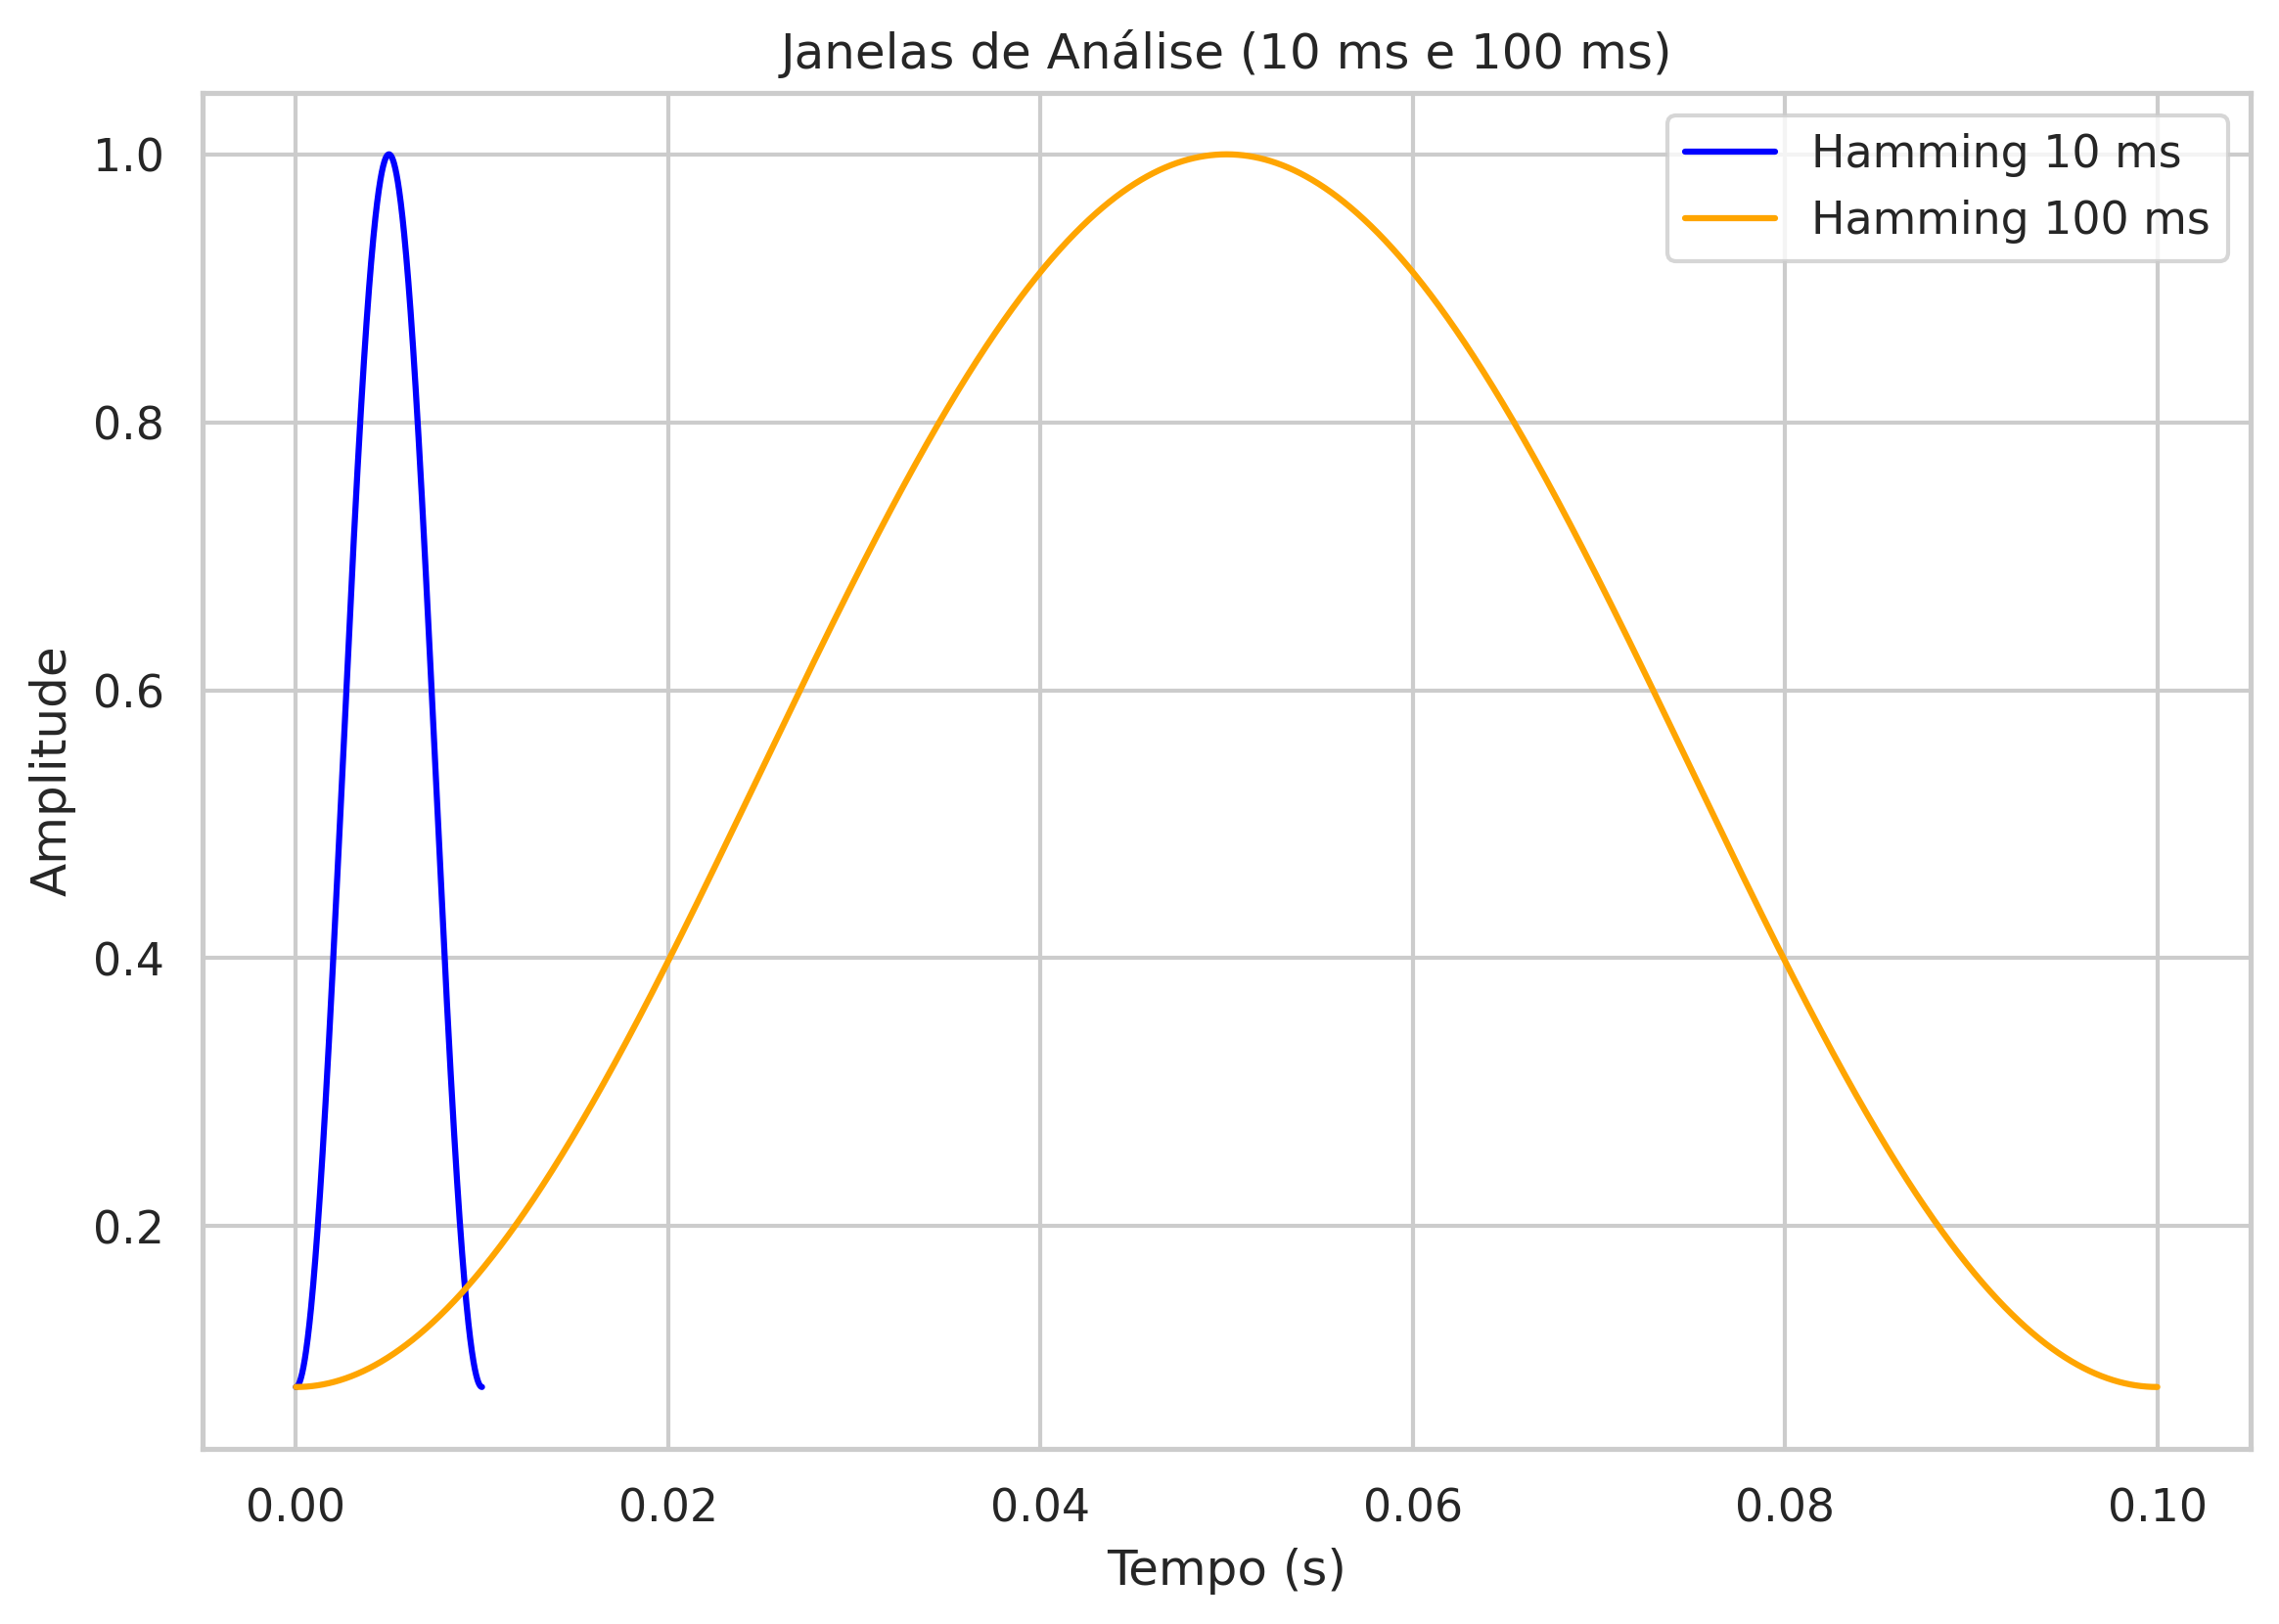

In [10]:
sns.lineplot(x=time_10_ms, y=hamming_window_10_ms, label='Hamming 10 ms', color='blue')
sns.lineplot(x=time_100_ms, y=hamming_window_100_ms, label='Hamming 100 ms', color='orange')
plt.title('Janelas de Análise (10 ms e 100 ms)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.savefig('janelas_10ms_100ms.png')

Espectograma obtido para a janela de 10 ms.

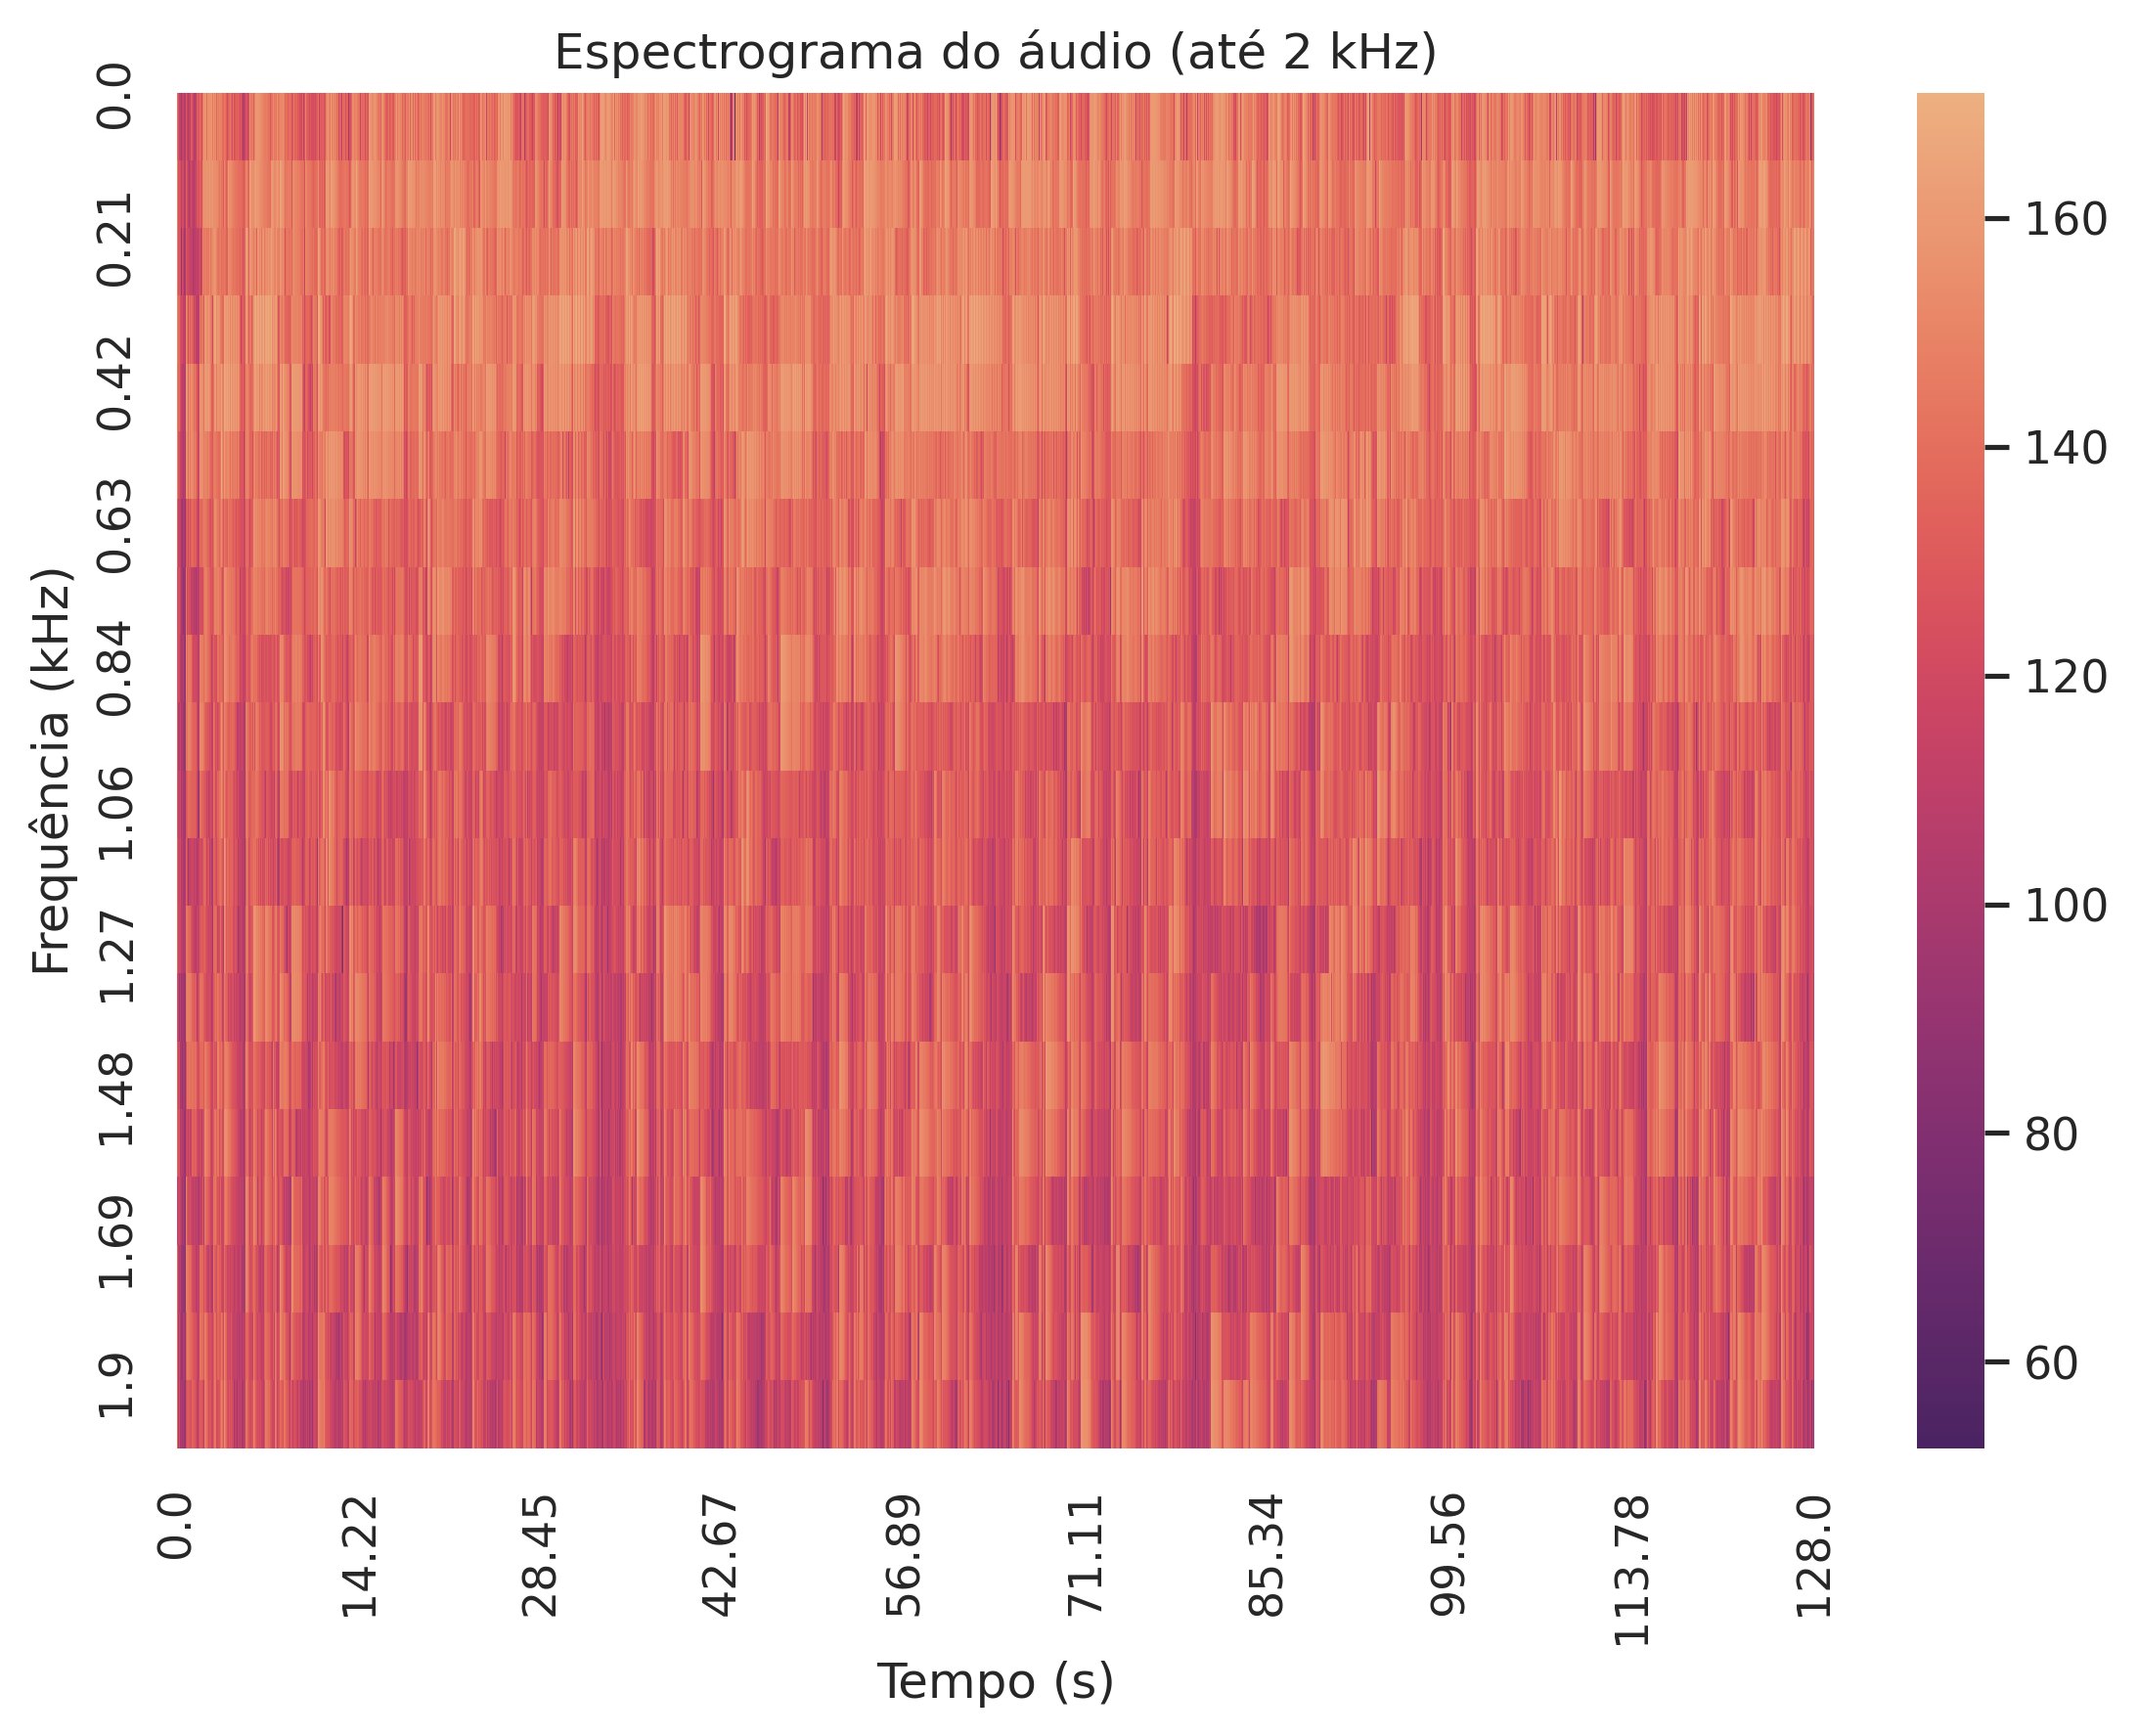

In [11]:
plotar_espectrograma(dados_wav, hamming_window_10_ms, hop_size=NUM_PONTOS_10_MS // 2, fs=fs, output_name="Hamming_10ms")

Espectograma obtido para a janela de 100 ms.

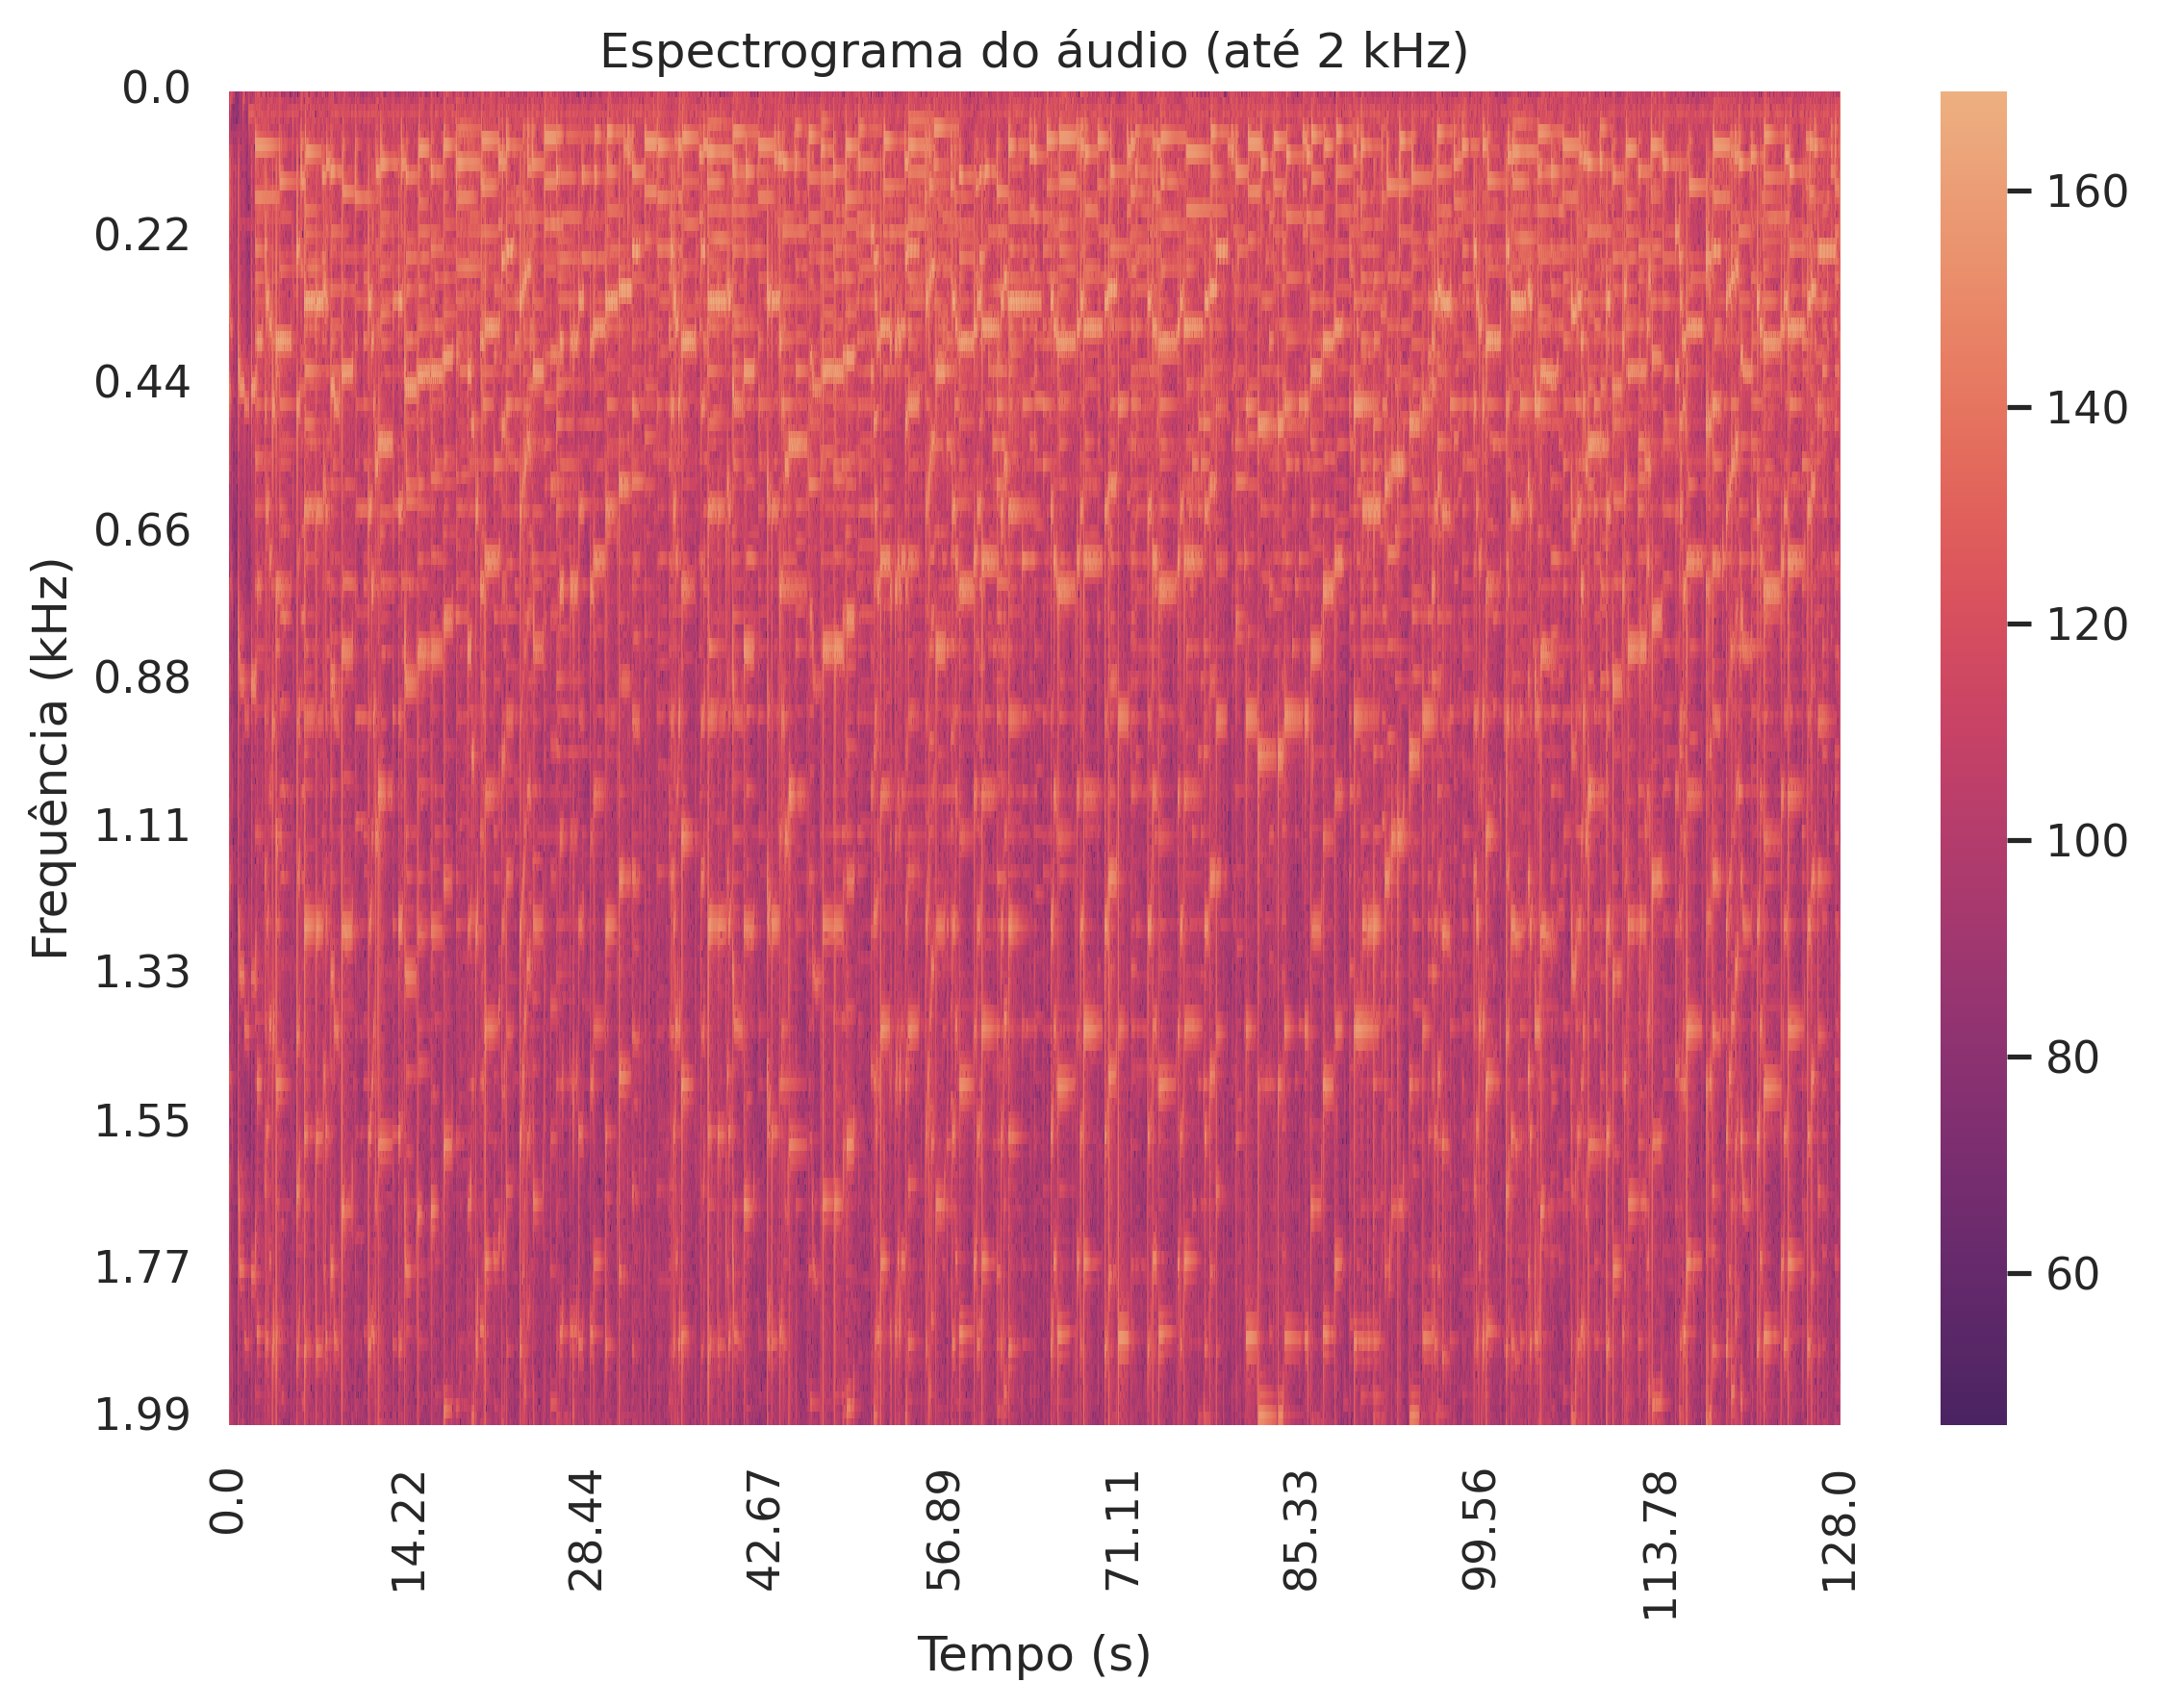

In [12]:
plotar_espectrograma(dados_wav, hamming_window_100_ms, hop_size=NUM_PONTOS_100_MS // 2, fs=fs, output_name="Hamming_100ms")

O espectrograma do sinal com a janela de 10 ms é espalhado na frequência, fenônemo ocorrido pelo príncipio da incerteza, que afirma não ser possível obter uma alta resolução na frequência e no tempo simultaneamente. Nesse caso, a maior resolução temporal obtida pela janela de 10 ms resultado num espectro de frequência borrado.

O espectograma do sinal com janela de 100ms apresenta uma boa resolução na frequência mas com perda na resolução temporal obtida.